In [20]:
import warnings
import itertools
import numpy as np 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd


import itertools                # loop okke create cheyaan vnditt
import statsmodels.api as sm    # trend, sasonality okke erikkanath
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14         #matplotlib nte parameters....
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
data = pd.read_csv("/home/sandra/Downloads/AirPassengers.csv")

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data['Month'] = pd.to_datetime(data['Month'])

In [5]:
data['Month'].min(), data['Month'].max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [6]:
data.shape

(144, 2)

In [7]:
data = data.groupby('Month')['#Passengers'].sum().reset_index()
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
y = data['#Passengers']

In [10]:
y

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [11]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


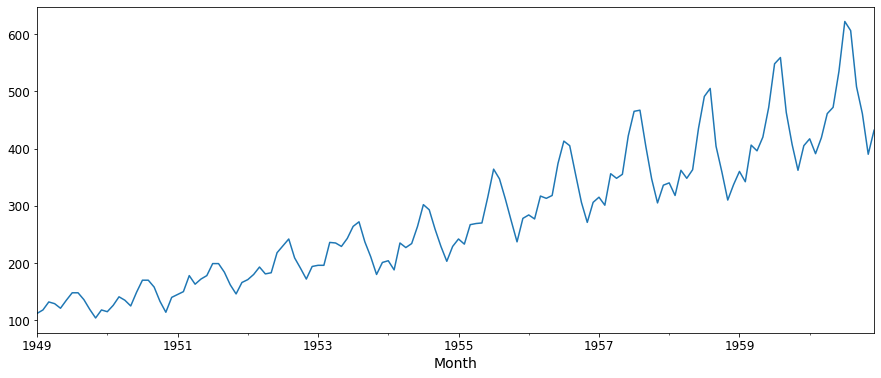

In [12]:
y.plot(figsize=(15, 6))
plt.show()

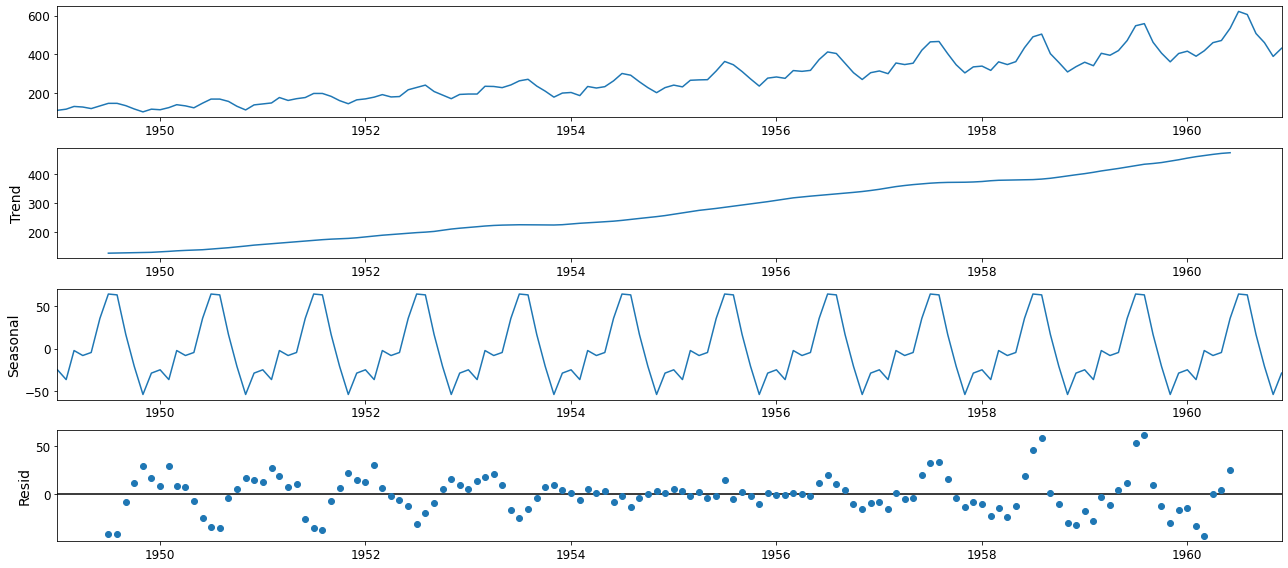

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()                                               # graph l cheriya difference ind

In [14]:
p = d = q =range(0,2)
pdq = list(itertools.product(p,d,q))

In [16]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [17]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [18]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [21]:
output_dict = dict()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            key = str(param)+"x"+str(param_seasonal)
            #print(key)
            output_dict.add({key:results.aic})
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2044.4329486427587
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1887.2751121956371
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1156.2914901508536
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1118.6259190717344
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1107.2562043231796
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1109.2437994445113
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1033.6172166730053
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1846.0789377571505
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1567.9916312321404
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1196.9983614399725
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1072.1382984044312
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1071.0026810723214
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1049.5801419227819
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1059.5112223290441
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:985.3346478032853
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1405.0006612949667
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1194.7130010

In [22]:
# Good models are obtained by minimising the AIC

In [23]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2854      0.406     -0.702      0.482      -1.082       0.511
ma.L1         -0.0245      0.388     -0.063      0.950      -0.785       0.736
ma.S.L12      -0.1076      0.101     -1.069      0.285      -0.305       0.090
sigma2       145.1295     17.663      8.216      0.000     110.510     179.749


In [30]:
pred = results.get_prediction(start=pd.to_datetime('1960-12-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower #Passengers,upper #Passengers
1960-12-01,415.608955,462.832219


In [31]:
results

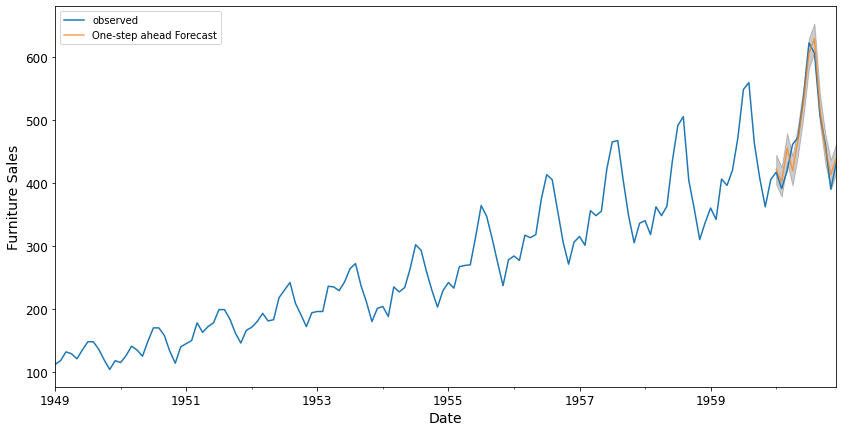

In [32]:
pred = results.get_prediction(start=pd.to_datetime('1960-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1949-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [34]:
# time series - time m corresponding component m, we are decomposing into 3 components - trend, seasonality, 
# unexpected events, 2 types of decomposition - additive and multipicative, then using ARIMA. p, d, q

In [35]:
# END